### Running the previous step in the pipeline: Data pre-processing.


In [2]:
%run ./2.data_pre_processing.ipynb

/home/not_real_fu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'source', 'reasoning'],
        num_rows: 80000
    })
    validation: Dataset({
        features: ['text', 'label', 'source', 'reasoning'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['text', 'label', 'source', 'reasoning'],
        num_rows: 10200
    })
})
                                                text            label  \
0  Your flight has been rescheduled for 10:00 AM ...          neutral   
1  We're happy to accommodate your dietary prefer...           polite   
2  Our vegetarian options are available on the me...          neutral   
3  I understand your frustration with the recent ...  somewhat polite   
4  I'll do my best to find a suitable replacement...  somewhat polite   

                                  source  \
0  meta-llama/Meta-Llama-3.1-8B-Instruct   
1  meta-llama/Meta-Llama-3.1-8B-Instruct   
2  meta-llama/Meta-Llama-3.1-8B-Instruct   
3  meta-llama/Meta-Llama-3.1

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/not_real_fu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['flight reschedul tomorrow pleas check airport websit updat chang', 'happi accommod dietari prefer vegetarian option care craft ensur delici satisfi meal would like recommend dish fit need', 'vegetarian option avail menu chef modifi dish suit dietari need', 'understand frustrat recent tournament result review stand see improv experi', 'best find suitabl replac item look need know look']


## **Check the Basics**
### Let's just check some basic attributes in EDA for our dataset.

In [3]:
training_set.isnull().sum()

text             0
label            0
source           0
reasoning    40001
dtype: int64

##### The reasoning label has some NaN values, but we can just ignore that column at all for our task.

##### As we now have our corpus, before and after pre-processing, we can proceed to the exploratory data analysis with both corpus.

In [4]:
training_set['clean_text'] = clean_corpus;
training_set['unclean_text'] = unclean_corpus;

print(training_set.head());

                                                text            label  \
0  Your flight has been rescheduled for 10:00 AM ...          neutral   
1  We're happy to accommodate your dietary prefer...           polite   
2  Our vegetarian options are available on the me...          neutral   
3  I understand your frustration with the recent ...  somewhat polite   
4  I'll do my best to find a suitable replacement...  somewhat polite   

                                  source  \
0  meta-llama/Meta-Llama-3.1-8B-Instruct   
1  meta-llama/Meta-Llama-3.1-8B-Instruct   
2  meta-llama/Meta-Llama-3.1-8B-Instruct   
3  meta-llama/Meta-Llama-3.1-8B-Instruct   
4  meta-llama/Meta-Llama-3.1-8B-Instruct   

                                           reasoning  \
0  This text would be classified as "neutral" bec...   
1  This text is polite because it expresses grati...   
2  This text would be classified as "neutral" bec...   
3  This text would be classified as "somewhat pol...   
4  This text wou

## **Exploratory Data Analysis**
#### The sections bellow will analyse our dataset

### **Class Distribution**

##### Firstly, let's start by analysing how much classes we have and how well those classes are distributed.

In [5]:
print(training_set['label'].nunique());

4


Amount of each class in the training set:
label
neutral            20000
polite             20000
somewhat polite    20000
impolite           20000
Name: count, dtype: int64


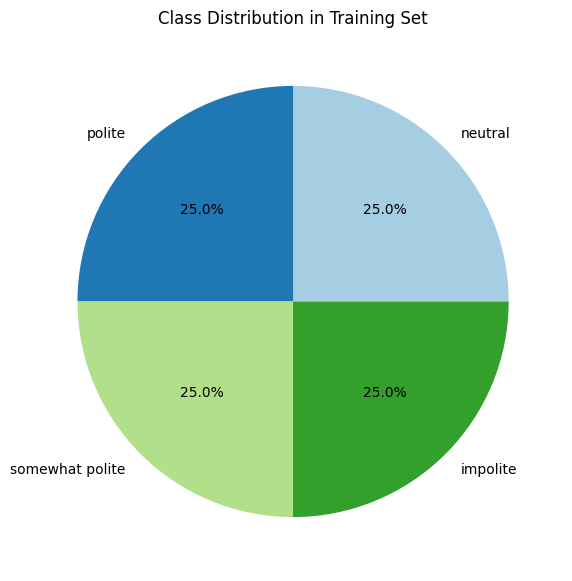

In [6]:
import matplotlib.pyplot as plt

label_counts = training_set["label"].value_counts()

print("Amount of each class in the training set:")
print(label_counts)

plt.figure(figsize=(7, 7))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
plt.title("Class Distribution in Training Set")
plt.show()

##### As we can see, we have a perfectly balanced dataset as each label has 20000 examples.

### **Counts and Length**

##### It is also important to know the characteristics of the documents we are taking into consideration on this task. 

##### Firstly, let's check the Word Count of each document's text.

First Quartile (Q1) for unclean text: 23.0
Third Quartile (Q3) for unclean text: 38.0
First Quartile (Q1) for clean text: 10.0
Third Quartile (Q3) for clean text: 18.0


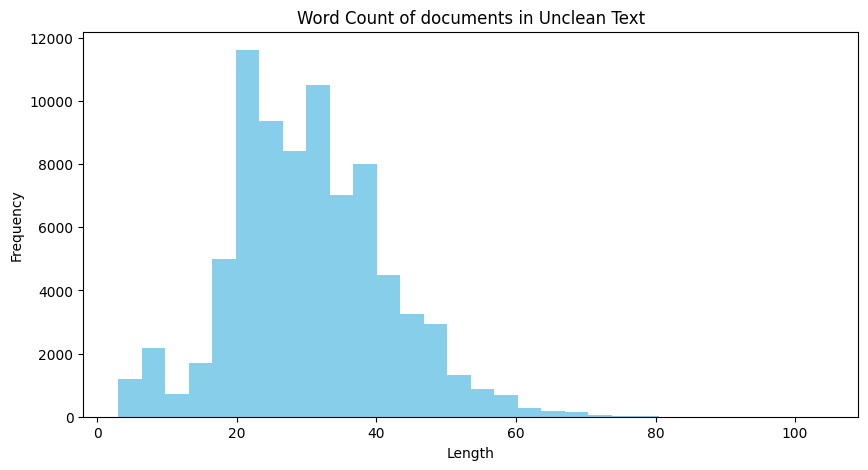

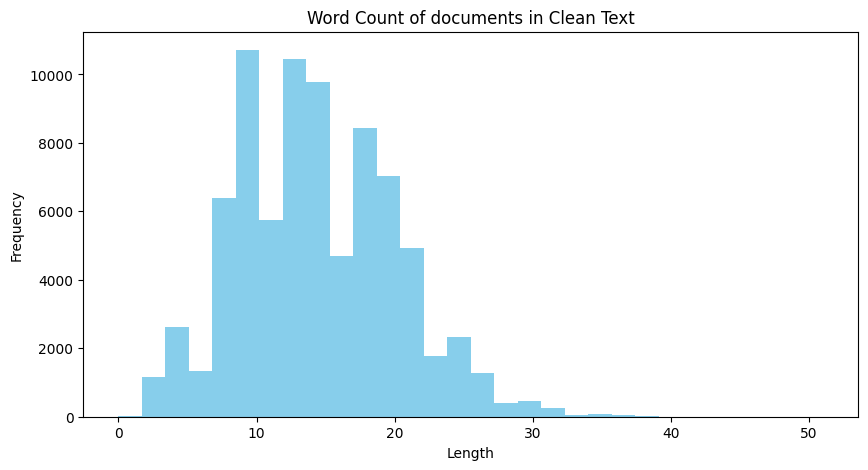

In [7]:
word_count = training_set["unclean_text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
plt.hist(word_count, bins=30, color="skyblue")

plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Word Count of documents in Unclean Text")

# Calculate Q1 and Q3
Q1 = word_count.quantile(0.25)
Q3 = word_count.quantile(0.75)

print("First Quartile (Q1) for unclean text:", Q1)
print("Third Quartile (Q3) for unclean text:", Q3)

word_count = training_set["clean_text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
plt.hist(word_count, bins=30, color="skyblue")

plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Word Count of documents in Clean Text")

# Calculate Q1 and Q3
Q1 = word_count.quantile(0.25)
Q3 = word_count.quantile(0.75)

print("First Quartile (Q1) for clean text:", Q1)
print("Third Quartile (Q3) for clean text:", Q3)

##### Our documents have mostly between 23 and 38 words at the unclean text and 10 and 18 words at the clean text. This is expectable of course as we have a stopwords filter included in our text pre-processing pipeline.

##### We can consider our dataset is composed of small text for this problem. This may affect our decisions and performance of certain algorithms further on this work.

##### Now let's proceed with the character count

First Quartile (Q1) for unclean text: 129.0
Third Quartile (Q3) for unclean text: 217.0
First Quartile (Q1) for clean text: 63.0
Third Quartile (Q3) for clean text: 116.0


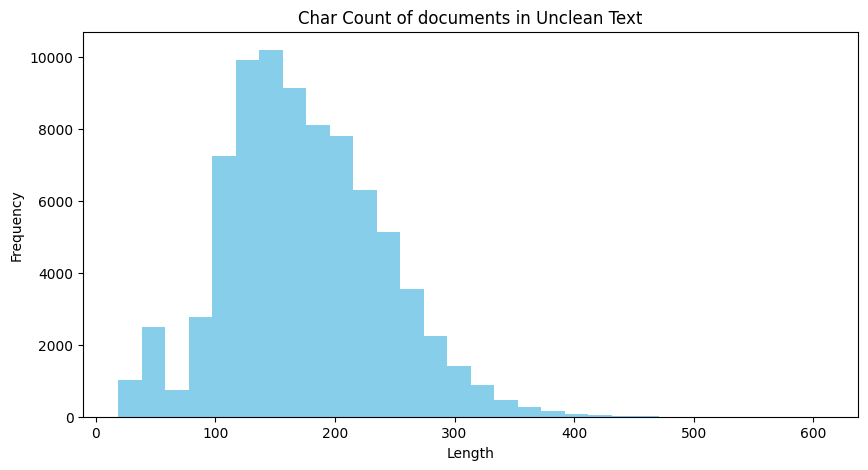

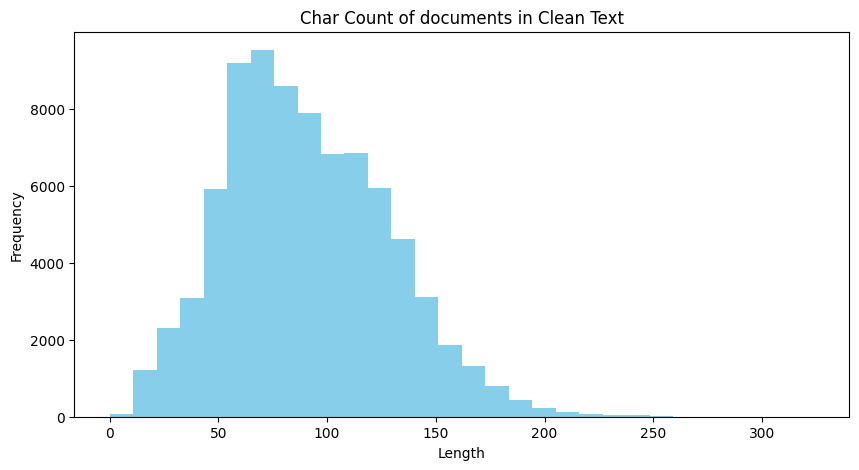

In [8]:
char_count = training_set["unclean_text"].apply(lambda x: len(x))

plt.figure(figsize=(10, 5))
plt.hist(char_count, bins=30, color="skyblue")

plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Char Count of documents in Unclean Text")

# Calculate Q1 and Q3
Q1 = char_count.quantile(0.25)
Q3 = char_count.quantile(0.75)

print("First Quartile (Q1) for unclean text:", Q1)
print("Third Quartile (Q3) for unclean text:", Q3)

char_count = training_set["clean_text"].apply(lambda x: len(x))

plt.figure(figsize=(10, 5))
plt.hist(char_count, bins=30, color="skyblue")

plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Char Count of documents in Clean Text")

# Calculate Q1 and Q3
Q1 = char_count.quantile(0.25)
Q3 = char_count.quantile(0.75)

print("First Quartile (Q1) for clean text:", Q1)
print("Third Quartile (Q3) for clean text:", Q3)

##### Now let's proceed to the average length of words and the average sentence length in terms of number of characters


In [9]:
import numpy as np
from nltk import tokenize

print("Unclean text average sentence length:")
print(np.mean(training_set['unclean_text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))))
print("Clean text average sentence length:")
print(np.mean(training_set['clean_text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))))
print("Unclean text average word length:")
print(np.mean(training_set['unclean_text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))))
print("Clean text average word length:")
print(np.mean(training_set['clean_text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))))


Unclean text average sentence length:
84.82997663690476
Clean text average sentence length:


/home/not_real_fu/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/not_real_fu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


90.54438180477256
Unclean text average word length:
4.7908009727635275
Clean text average word length:
5.370793926543044


### **TF-IDF**
##### This is a measure that takes into account the discriminative power of the words (repetitions of a word accross documents/text or power of a word to distinguish the document content) from the vocabulary considering all the documents(our texts), by assigning a weight to each of the terms of the vocabulary.
##### **TF** stands for Term Frequency and is the total frequency that a word appears considering all the documents;
##### **DF** stands for Document Frequency and it measures the number of documents that have a certain word. The higher the more frequent is a word accross all the documents (bad thing -> low discriminative power);
##### **IDF** stands for Inverse Document Frequency and the inverse of the DF. Higher means rarer the word is accross all the documents (good thing -> high discriminative power).
##### **TF-IDF** is a measure that is the product of **TF** and **IDF**:
- ##### Highest when term occurs many times within a small number of documents;
- ##### Lower when the term occurs fewer times in a document, or occurs in many documents;
- ##### Lowest when the term occurs in virtually all documents.


##### This measure is extremely useful in exploratory data analysis as we get a proper information about the most important words in a dataset while reducing the importance of common words that may appear in a large set of documents.
##### As we saw before, our documents are usually small, so TF-IDF may not be able to perform too well in differentiating low and high occurences.

/tmp/ipykernel_8345/1921715280.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette="viridis")


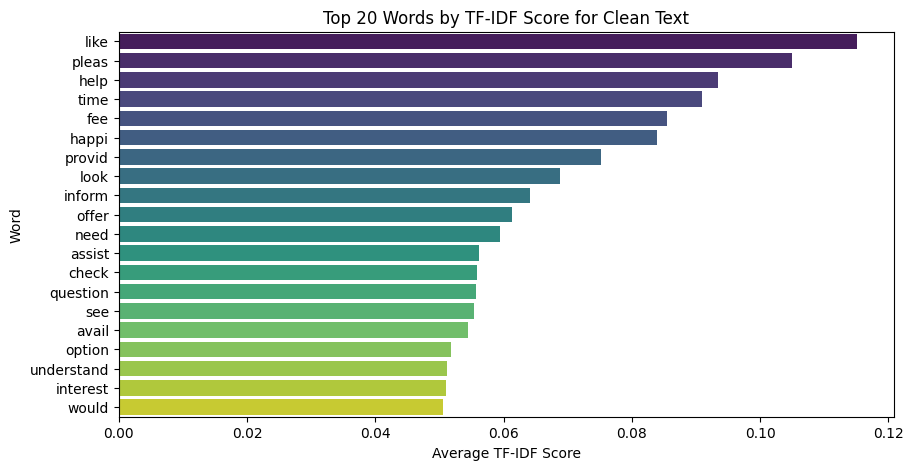

/tmp/ipykernel_8345/1921715280.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette="viridis")


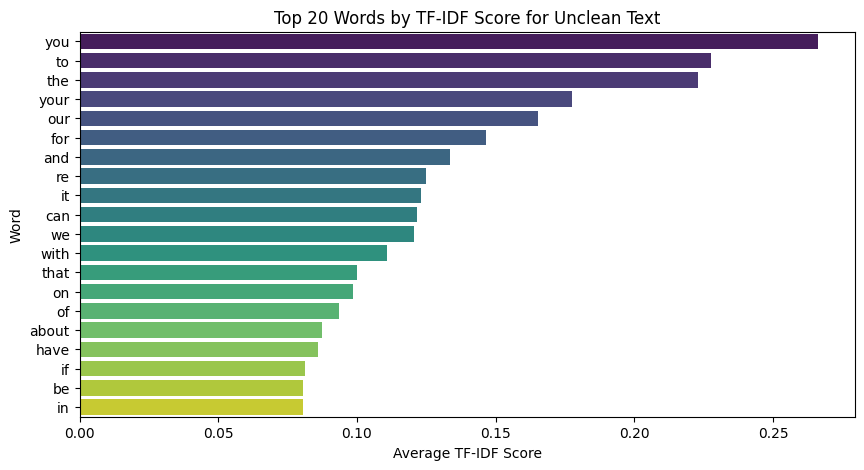

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

max_features = 20 #alter this value to higher to see a general insight
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=max_features)  # Select the top 20 words
tfidf_matrix = tfidf.fit_transform(training_set["clean_text"])

# Convert TF-IDF scores into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Get mean TF-IDF scores for each word
tfidf_mean = tfidf_df.mean().sort_values(ascending=False)

# Plot the top TF-IDF words
plt.figure(figsize=(10, 5))
sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette="viridis")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Word")
plt.title("Top 20 Words by TF-IDF Score for Clean Text")
plt.show()

tfidf_matrix = tfidf.fit_transform(training_set["unclean_text"])

# Convert TF-IDF scores into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Get mean TF-IDF scores for each word
tfidf_mean = tfidf_df.mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette="viridis")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Word")
plt.title("Top 20 Words by TF-IDF Score for Unclean Text")
plt.show()

##### As we can see, at the clean text we can clearly see some words that may have a big impact for our classification task (sentiment analysis) have a high TF-IDF Score, such as "like" and "pleas" which might indicate informal and formal language.
##### As for the unclean text, the majority of the words are stop words that don't seem to have much value.